In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
name1880 = pd.read_csv(r'C:\Users\Zishi\Python learning notebooks\Pydata\names\yob1880.txt',names=['name','gender','births'])

In [4]:
name1880

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [5]:
name1880.groupby('gender').births.sum()

gender
F     90992
M    110490
Name: births, dtype: int64

In [7]:
years = range(1880,2016)
pieces =[]
columns = ['name','gender','births']
for year in years:
    path = r'C:\Users\Zishi\Python learning notebooks\Pydata\names\yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces,ignore_index=True)

In [8]:
names.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [10]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858689 entries, 0 to 1858688
Data columns (total 4 columns):
name      object
gender    object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 56.7+ MB


In [12]:
total_births = names.pivot_table('births',index='year',
                                columns='gender',aggfunc=sum)

In [13]:
total_births.tail()

gender,F,M
year,,
2011,1754424,1894262
2012,1755254,1890889
2013,1747544,1883945
2014,1777242,1910876
2015,1769325,1898858


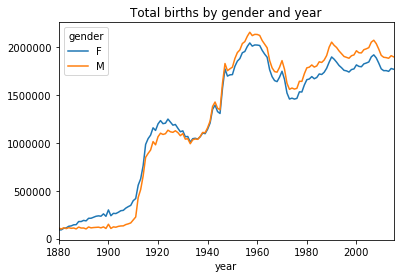

In [14]:
total_births.plot(title='Total births by gender and year')

In [16]:
def add_prop(group):
    #births = group.births.astype(float)
    group['prop'] = group['births']/group['births'].sum()
    return group

names = names.groupby(['year','gender']).apply(add_prop)

In [17]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858689 entries, 0 to 1858688
Data columns (total 5 columns):
name      object
gender    object
births    int64
year      int64
prop      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 70.9+ MB


In [18]:
import numpy as np
np.allclose(names.groupby(['year','gender']).prop.sum(),1)

True

In [21]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

top1000 = names.groupby(['year','gender']).apply(get_top1000)

In [22]:
top1000

name gender  births  year      prop
year gender                                                  
1880 F      0             Mary      F    7065  1880  0.077644
            1             Anna      F    2604  1880  0.028618
            2             Emma      F    2003  1880  0.022013
            3        Elizabeth      F    1939  1880  0.021310
            4           Minnie      F    1746  1880  0.019189
            5         Margaret      F    1578  1880  0.017342
            6              Ida      F    1472  1880  0.016177
            7            Alice      F    1414  1880  0.015540
            8           Bertha      F    1320  1880  0.014507
            9            Sarah      F    1288  1880  0.014155
            10           Annie      F    1258  1880  0.013825
            11           Clara      F    1226  1880  0.013474
            12            Ella      F    1156  1880  0.012704
            13        Florence      F    1063  1880  0.011682
            14            Cora      F    1045  1880  0.011485
            15          Martha      F    1040  1880  0.011430
            16           Laura      F    1012  1880  0.011122
            17          Nellie      F     995  1880  0.010935
            18           Grace      F     982  1880  0.010792
            19          Carrie      F     949  1880  0.010429
            20           Maude      F     858  1880  0.009429
            21           Mabel      F     808  1880  0.008880
            22          Bessie      F     796  1880  0.008748
            23          Jennie      F     793  1880  0.008715
            24        Gertrude      F     787  1880  0.008649
            25           Julia      F     783  1880  0.008605
            26          Hattie      F     769  1880  0.008451
            27           Edith      F     768  1880  0.008440
            28          Mattie      F     704  1880  0.007737
            29            Rose      F     700  1880  0.007693
...                        ...    ...     ...   ...       ...
2015 M      1845703     Yadiel      M     211  2015  0.000111
            1845704      Yahya      M     211  2015  0.000111
            1845700     Aarush      M     211  2015  0.000111
            1845702      Robin      M     211  2015  0.000111
            1845701   Deangelo      M     211  2015  0.000111
            1845705      Boden      M     209  2015  0.000110
            1845707        Kye      M     209  2015  0.000110
            1845708      Kylen      M     209  2015  0.000110
            1845709       Todd      M     209  2015  0.000110
            1845710     Truman      M     209  2015  0.000110
            1845706        Ean      M     209  2015  0.000110
            1845712    Gilbert      M     208  2015  0.000110
            1845713     Haiden      M     208  2015  0.000110
            1845711      Chevy      M     208  2015  0.000110
            1845715    Dangelo      M     207  2015  0.000109
            1845716      Juelz      M     207  2015  0.000109
            1845717    Osvaldo      M     207  2015  0.000109
            1845714    Brixton      M     207  2015  0.000109
            1845718     Bishop      M     206  2015  0.000108
            1845719     Freddy      M     206  2015  0.000108
            1845720     Reagan      M     206  2015  0.000108
            1845721    Frankie      M     205  2015  0.000108
            1845722     Malaki      M     205  2015  0.000108
            1845725    Jayvion      M     204  2015  0.000107
            1845726      Leroy      M     204  2015  0.000107
            1845724    Deshawn      M     204  2015  0.000107
            1845723     Camren      M     204  2015  0.000107
            1845728     Jaydon      M     203  2015  0.000107
            1845727      Briar      M     203  2015  0.000107
            1845730       Ayan      M     202  2015  0.000106

[271877 rows x 5 columns]

In [23]:
boys = top1000[top1000.gender=='M']
girls = top1000[top1000.gender=='F']

In [24]:
total_births = top1000.pivot_table('births',index='year',
                                  columns='name',aggfunc=sum)

In [26]:
total_births.head()

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [28]:
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A8F45E828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000029A8F52BEF0>], dtype=object)

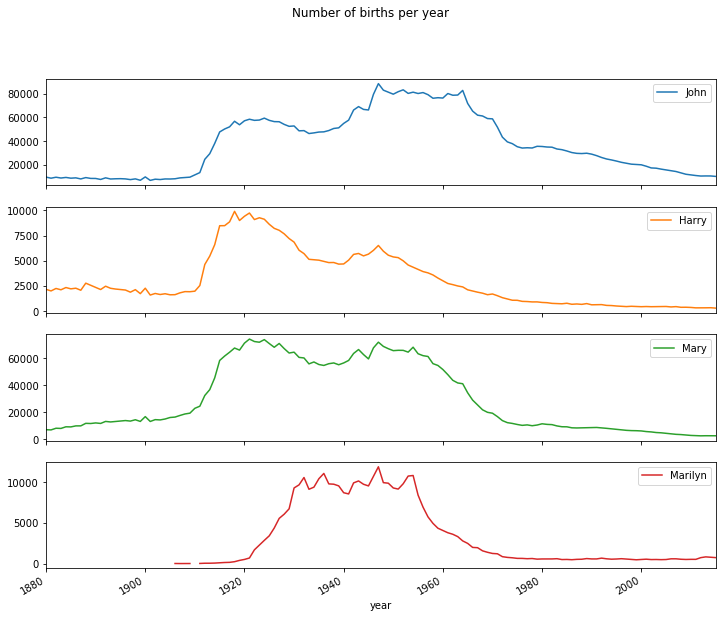

In [29]:
subset.plot(subplots=True,figsize=(12,10),grid=False,
           title='Number of births per year')